In [ ]:
!git clone https://github.com/khdlr/HED-UNet.git

Cloning into 'HED-UNet'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 72 (delta 22), reused 56 (delta 12), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [ ]:
cd /content/drive/MyDrive/HED-UNet

/content/drive/MyDrive/HED-UNet


In [ ]:
!pip install rasterio
!pip install einops

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
cd /content/drive/MyDrive/HED-UNet

/content/drive/MyDrive/HED-UNet


In [ ]:
!python train.py 

Training on cuda device
Building/Checking Tile Cache: 100% 10/10 [00:00<00:00, 769.26it/s]
100% 9/9 [00:05<00:00,  1.51it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 1/1 [00:01<00:00,  1.05s/it]
Epoch 01 - Val: Loss: 1.104, SegAcc: 0.989, EdgeAcc: 0.966
100% 9/9 [00:02<00:00,  3.83it/s]
  0% 0/1 [00:00<?, ?it/s][W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork.

In [ ]:
cd /content/drive/MyDrive/dataset/train/gt1/

/content/drive/MyDrive/dataset/train/gt1


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/dataset/train/gt1'
# Store the image file names in a list as long as they are jpgs
images = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.png']

In [ ]:
images=sorted(images)

In [ ]:
images

['T1_0001_S8.png',
 'T1_0002_S8.png',
 'T1_0003_S8.png',
 'T1_0004_S7.png',
 'T1_0005_S8.png',
 'T1_0006_S8.png',
 'T1_0007_S8.png',
 'T1_0009_S7.png',
 'T1_0010_S8.png',
 'T1_0011_S8.png']

In [ ]:
cd /content/drive/MyDrive/Dataset_unet/2. Ground Truth Labels

/content/drive/MyDrive/Dataset_unet/2. Ground Truth Labels


In [ ]:
i=0
# define a threshold, 128 is the middle of black and white in grey scale
thresh = 128
for img in images:
  img1=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img1_1=np.where(img1==1,130,0)
  img2=np.where(img1==2,0,0)
  img3=np.where(img1==3,0,0)
  img4=np.where(img1==4,0,0)
  img5=np.where(img1==5,130,0)
  img6=np.where(img1==6,130,0)
  imgall=img1_1+img5+img6
# threshold the image
  img = imgall.astype(np.uint8)
  img_binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

  cv2.imwrite('/content/drive/MyDrive/dataset/train/gt/gt{}.png'.format(i),img1)
  i+=1


TypeError: ignored

In [ ]:
cropped_images = "GrabCut"
import glob
if not os.path.exists(cropped_images):
    os.makedirs(cropped_images)

# Load data
filepath = "/content/drive/MyDrive/dataset/train/gt1/"
orig_files = [file for file in glob.glob(filepath+"/*.png")]
new_files = [os.path.join(cropped_images, os.path.basename(f)) for f in orig_files]

for orig_f,new_f in zip(orig_files,new_files):
    #image = cv2.imread(orig_f)
    img1=cv2.imread(orig_f,cv2.IMREAD_GRAYSCALE)
    img1_1=np.where(img1==1,130,0)
    img2=np.where(img1==2,0,0)
    img3=np.where(img1==3,0,0)
    img4=np.where(img1==4,0,0)
    img5=np.where(img1==5,130,0)
    img6=np.where(img1==6,130,0)
    imgall=img1_1+img5+img6
# threshold the image
    img = imgall.astype(np.uint8)
    img_binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

  

    cv2.imwrite(new_f, img_binary)

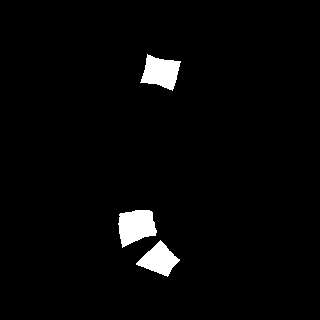

In [ ]:
import cv2

#save image
#cv2.imwrite('D:/black-and-white.png',img_binary)

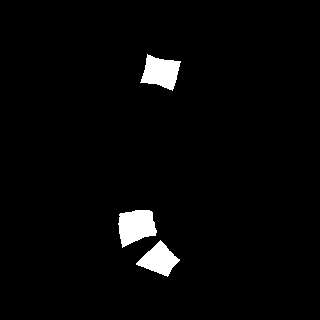

In [ ]:
import cv2
img1=cv2.imread(images[0])
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_1=np.where(img1==1,255,0)
img2=np.where(img1==2,0,0)
img3=np.where(img1==3,0,0)
img4=np.where(img1==4,0,0)
img5=np.where(img1==5,255,0)
img6=np.where(img1==6,255,0)
imgall=img1_1+img5+img6
cv2_imshow(imgall)

In [ ]:
import numpy as np
import cv2
img1=cv2.imread(images[0])
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img3_6=np.where(gray1==4,255,0)
img3_6=np.where(gray1==5,255,0)
#gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

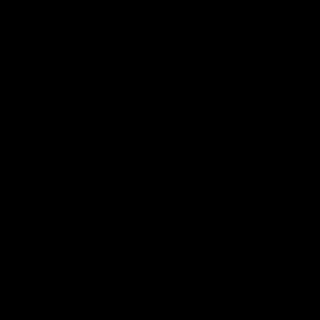

In [ ]:
cv2_imshow(img3_6)